In [1]:
import matplotlib.pyplot as plt
from keras.api import Sequential
from keras.api import layers
from keras.api.datasets import mnist
from keras.api.utils import load_img, to_categorical

2024-12-26 20:17:23.071732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735237043.140217    1974 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735237043.160206    1974 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 20:17:23.327161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Завантажуємо датасет за допомогою бібліотеки Keras

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


### Маємо 60к тренувальних цифр та 10к тестових

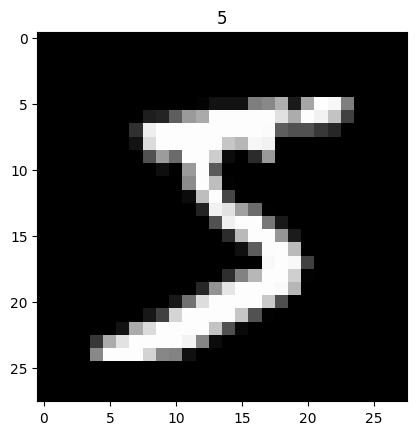

In [3]:
image = x_train[0]

plt.imshow(image, cmap='gray')
plt.title(y_train[0])
plt.show()

### Проведемо препроцесинг масивів для обробки нейронною мережею

In [4]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

input shape:  784


In [5]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/yevhenii/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735237046.855429    1974 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2d:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10


I0000 00:00:1735237048.385826    2105 service.cc:148] XLA service 0x7f011c004b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735237048.386054    2105 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-26 20:17:28.408839: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735237048.490379    2105 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-26 20:17:29.926898: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_277', 448 bytes spill stores, 448 bytes spill loads

2024-12-26 20:17:30.274557: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_277', 440 b

750/750 - 7s - 10ms/step - accuracy: 0.9360 - loss: 0.2158 - val_accuracy: 0.9651 - val_loss: 0.1084
Epoch 2/10
750/750 - 2s - 3ms/step - accuracy: 0.9747 - loss: 0.0814 - val_accuracy: 0.9684 - val_loss: 0.1034
Epoch 3/10
750/750 - 2s - 3ms/step - accuracy: 0.9823 - loss: 0.0551 - val_accuracy: 0.9736 - val_loss: 0.0938
Epoch 4/10
750/750 - 2s - 3ms/step - accuracy: 0.9872 - loss: 0.0407 - val_accuracy: 0.9773 - val_loss: 0.0829
Epoch 5/10
750/750 - 2s - 3ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9760 - val_loss: 0.0887
Epoch 6/10
750/750 - 2s - 3ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9726 - val_loss: 0.1222
Epoch 7/10
750/750 - 2s - 3ms/step - accuracy: 0.9921 - loss: 0.0239 - val_accuracy: 0.9718 - val_loss: 0.1104
Epoch 8/10
750/750 - 2s - 3ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9743 - val_loss: 0.1151
Epoch 9/10
750/750 - 2s - 3ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9770 - val_loss: 0.0980
Epoch 10/10

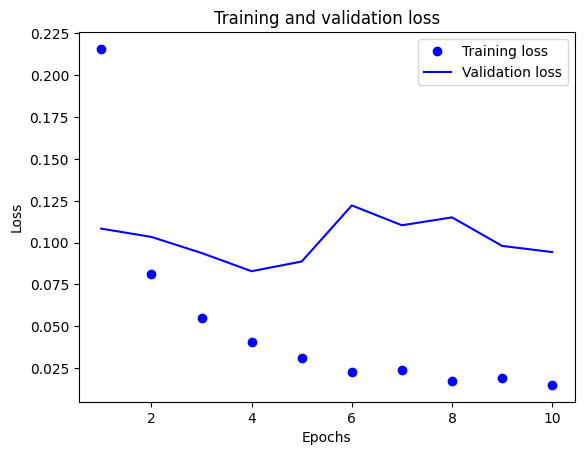

In [7]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'{model.metrics_names[0]} score:', score[0])
print(f'{model.metrics_names[1]} score:', score[1])

loss score: 0.0860321894288063
compile_metrics score: 0.9793999791145325


### Спробуємо класифікувати самостійно намальовані цифри

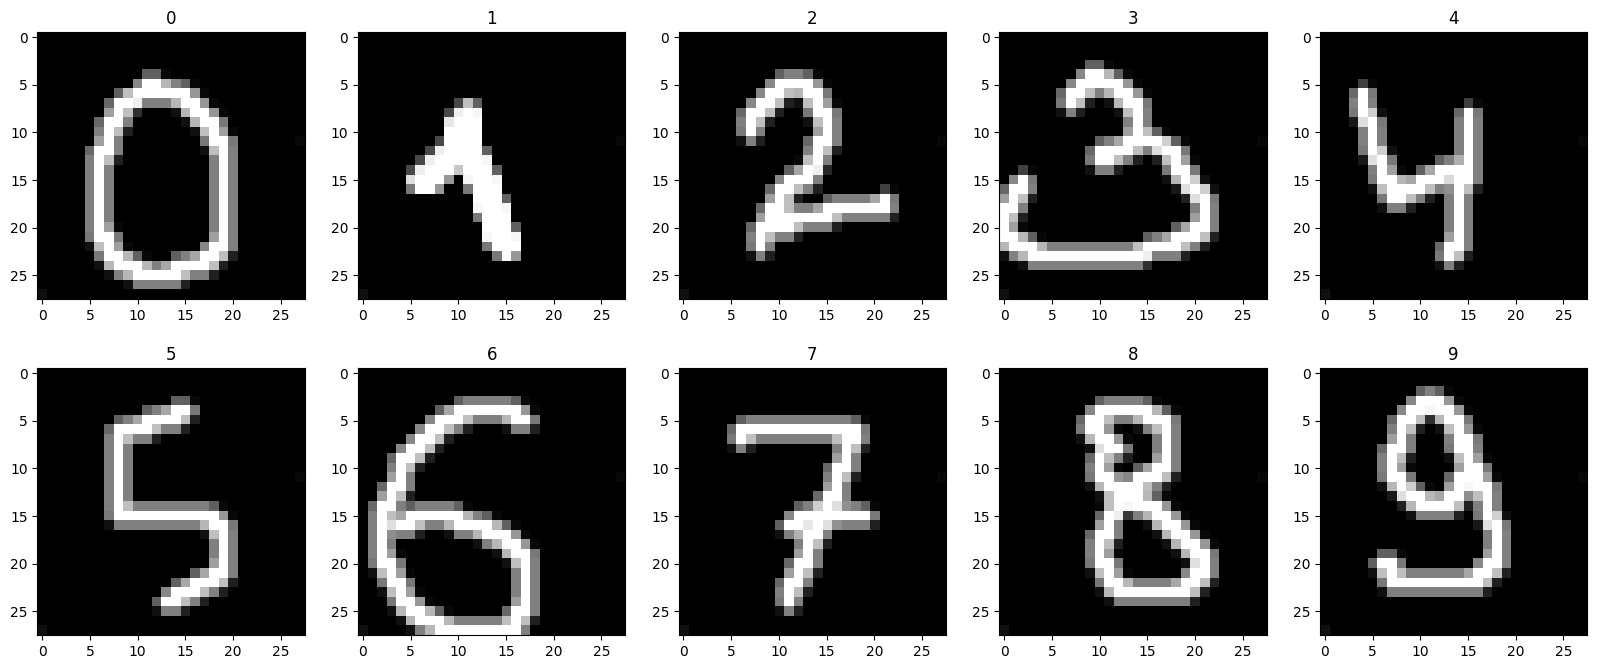

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[0, 4, 2, 3, 4, 5, 7, 7, 8, 9]

In [9]:
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
imgs = []
for i in range(num_classes):
    img = np.array(load_img(f"{i}.png", target_size=(28, 28), color_mode="grayscale"))
    img = img.astype('float32')
    j = 1 if i >= 5 else 0
    ax[j, i % 5].imshow(img, cmap='gray')
    ax[j, i % 5].set_title(i)
    imgs.append(img)

plt.show()

predicts = model.predict(np.array(imgs).reshape(len(imgs), 784))
res = []
for pred in predicts:
    res.append(int(np.argmax(pred)))

res

### Точність класифікації на самописних номерах гірша, хоч і функція втрат при 10 епохах дорівнює 10%. Для покращення моделі можна використати додаткові методи покращення, наприклад Augmentation, коли зображення цифр можна "посунути" в якійсь площині (наприклад, цифри 8 та 0 віддзеркалити як по обох осях)